# Table of Contents
 
1. Importing Libraries
2. Dataset Description
3. Importing the Dataset
4. Data Cleaning
5. Feature Engineering
6. Data Splitting
7. Model Training & Evaluation
8. Further Evaluation of Model

## 1. Importing Libraries

In [50]:
# Data Processing
import pandas as pd
import numpy as np 

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix


## 2. Dataset Description

- person_age - Age of the borrower applying for a loan
- person_income - Annual income of the borrower applying for a loan
- person_home_ownership
    - OWN - They own a home
    - RENT - They rent a home
    - MORTGAGE - They have a mortgage on the home they own
    - OTHER - Other categories of home ownership
- person_emp_length - Employment length of borrower in years
- loan_intent - What the borrower intends to use the loan for
- loan_grade 
    - A - The borrower has a high creditworthiness, indicating low risk.
    - B - The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C - The borrower's creditworthiness is moderate.
    - D - The borrower is considered to have higher risk compared to previous grades.
    - E - The borrower's creditworthiness is lower, indicating a higher risk.
    - F - The borrower poses a significant credit risk.
    - G - The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt - The loan amount the borrower is requesting
- loan_int_rate - The loan interest rate
- loan_status 	
    - 0 is non-default (The borrower paid every loan payment on time, so no default was indicated)
    - 1 is default (The borrower failed to pay according to the agreed terms, so they defaulted on the loan)
- loan_percent_income - Percentage of income from the loan
- cb_person_default_on_file
    - Y - The borrower has a histroy of defaulting on their loans
    - N - The borrower does not have a history of defaulting on their loans
- cb_preson_cred_hist_length - Crdit history of the borrower

## 3. Importing the Dataset

In [51]:
# Reading the data and printing a sample

data = pd.read_csv("credit_risk_dataset.csv")

data.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
11772,25,75600,MORTGAGE,7.0,MEDICAL,C,15000,12.68,0,0.20,N,2
22773,35,58000,MORTGAGE,8.0,MEDICAL,C,6000,12.99,0,0.10,Y,8
31853,42,153000,MORTGAGE,7.0,EDUCATION,G,25000,20.53,1,0.16,N,14
23117,32,55000,RENT,0.0,PERSONAL,B,8000,10.00,0,0.15,N,9
16256,22,41000,OWN,0.0,PERSONAL,A,1000,6.99,0,0.02,N,2


## 4. Data Cleaning

In [52]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Checking for outliers by describing the numerical features
descriptive_stats = data.describe()

missing_values, descriptive_stats

(person_age                       0
 person_income                    0
 person_home_ownership            0
 person_emp_length              895
 loan_intent                      0
 loan_grade                       0
 loan_amnt                        0
 loan_int_rate                 3116
 loan_status                      0
 loan_percent_income              0
 cb_person_default_on_file        0
 cb_person_cred_hist_length       0
 dtype: int64,
          person_age  person_income  person_emp_length     loan_amnt  \
 count  32581.000000   3.258100e+04       31686.000000  32581.000000   
 mean      27.734600   6.607485e+04           4.789686   9589.371106   
 std        6.348078   6.198312e+04           4.142630   6322.086646   
 min       20.000000   4.000000e+03           0.000000    500.000000   
 25%       23.000000   3.850000e+04           2.000000   5000.000000   
 50%       26.000000   5.500000e+04           4.000000   8000.000000   
 75%       30.000000   7.920000e+04           7.0

## 5. Feature Engineering

In [53]:
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'] = data.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))

# Correcting Outliers

age_99th_percentile = data['person_age'].quantile(0.99)
data['person_age'] = data['person_age'].clip(upper=age_99th_percentile)


emp_length_99th_percentile = data['person_emp_length'].quantile(0.99)
data['person_emp_length'] = data['person_emp_length'].clip(upper=emp_length_99th_percentile)

# Check if there are any missing values left and figuring out the effect of capping outliers
missing_values_after = data.isnull().sum()
descriptive_stats_after = data[['person_age', 'person_emp_length', 'person_income']].describe()

missing_values_after, descriptive_stats_after

C:\Users\nejra\AppData\Local\Temp\ipykernel_5384\831663846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)


(person_age                    0
 person_income                 0
 person_home_ownership         0
 person_emp_length             0
 loan_intent                   0
 loan_grade                    0
 loan_amnt                     0
 loan_int_rate                 0
 loan_status                   0
 loan_percent_income           0
 cb_person_default_on_file     0
 cb_person_cred_hist_length    0
 dtype: int64,
          person_age  person_emp_length  person_income
 count  32581.000000       32581.000000   3.258100e+04
 mean      27.659433           4.727970   6.607485e+04
 std        5.916690           3.849422   6.198312e+04
 min       20.000000           0.000000   4.000000e+03
 25%       23.000000           2.000000   3.850000e+04
 50%       26.000000           4.000000   5.500000e+04
 75%       30.000000           7.000000   7.920000e+04
 max       50.000000          17.000000   6.000000e+06)

## 6. Data Splitting

In [54]:
# Selecting categorical variables 
categorical_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Encoding categorical variables
encoder = OneHotEncoder(drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_vars]).toarray(),
                                columns=encoder.get_feature_names_out(categorical_vars))

# Dropping original categorical variables from the dataset
data.drop(categorical_vars, axis=1, inplace=True)

# Concatenating the encoded features with the original dataset
credit_risk_data_encoded = pd.concat([data, encoded_features], axis=1)

# Displaying the first few rows of the updated dataset
credit_risk_data_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,17.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## 7. Model Training & Evaluation

Choosing the Random Forest model for the credit risk assessment task is a strategic decision driven by its ability to handle complex, non-linear relationships and its robust performance on imbalanced datasets, typical of credit risk scenarios.

In [55]:
X = credit_risk_data_encoded.drop('loan_status', axis=1)
y = credit_risk_data_encoded['loan_status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26064, 22), (6517, 22), (26064,), (6517,))

In [56]:
random_forest = RandomForestClassifier(random_state=42)

# Training the model on the training set
random_forest.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

In [57]:
# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print(f"F1 Score: {f1_score_rf:.4f}")

Accuracy: 0.9293
ROC AUC Score: 0.9338
F1 Score: 0.8191


#### Interpreting the Results
Accuracy: Gives you the proportion of total predictions (default and non-default) the model got right.

ROC AUC Score: Tells you how well the model is able to distinguish between defaulting and non-defaulting loans. Higher values indicate better performance.

F1 Score: A high F1 score is crucial in imbalanced datasets and indicates a balanced recall and precision, meaning the model is effectively identifying the majority of true positives while keeping false positives low.

## 8. Further Evaluation of Model

#### Confusion Matrix
The confusion matrix is invaluable for understanding the model's performance in detail, especially for imbalanced datasets common in credit risk modeling. It shows not just the instances where the model was correct (true positives and true negatives) but also where it made mistakes (false positives and false negatives). This differentiation is crucial for credit risk models because the costs associated with false positives (wrongly predicting default) and false negatives (failing to predict a default) can vary significantly. By examining the confusion matrix, stakeholders can assess the model's practical utility and risk management effectiveness.

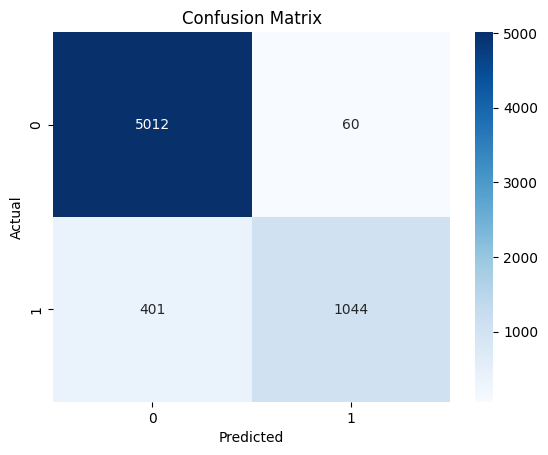

In [58]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Feature Importance 

Knowing which features most strongly influence the model's predictions can provide actionable insights, especially in credit risk assessment where understanding the factors that contribute to risk is as important as the prediction itself. Feature importance can guide risk management strategies, policy adjustments, and further data collection efforts. It helps in focusing on the most relevant factors that influence loan default risk, potentially informing more targeted interventions or adjustments to lending criteria.

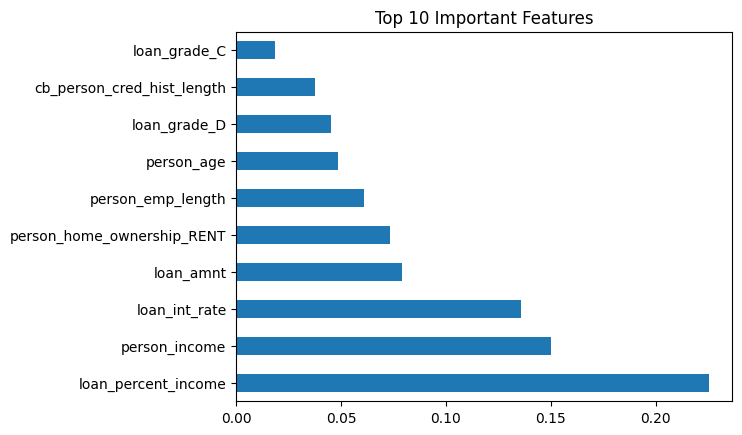

In [59]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()